In [43]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/gabinmberikongo/code/projet/loan_credit/scripts')
from processing import *
import seaborn as sns
%matplotlib inline

In [3]:
# importation dataframe

df = pd.read_csv('/Users/gabinmberikongo/code/projet/loan_credit/data/accepted_2007_to_2018Q4.csv')

/Users/gabinmberikongo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN


In [6]:
#data types 
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [10]:
# get percentage of null values by columns
get_na_percentage(df)

id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64

selection of columns with a percentage of NAN less than or equal to 50

In [11]:
# selection df : df
df_selected = select_column(df, 50)
df_selected.shape

(2260701, 107)

In [14]:
print(list(df_selected.columns))

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc

 **Removal of unnecessary columns**
* id
* zip_code
* url

In [15]:
df_selected = df_selected.drop(columns=["id", "zip_code", "url"])

In [21]:
num, cat = split_dataframe_by_dtype(df_selected)

In [46]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.00,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.00,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.00,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.99,30.99
installment,2260668.0,445.806823,267.173535,4.93,251.65,377.99,593.32,1719.83
...,...,...,...,...,...,...,...,...
tax_liens,2260563.0,0.046771,0.377534,0.00,0.00,0.00,0.00,85.00
tot_hi_cred_lim,2190392.0,178242.753744,181574.814655,0.00,50731.00,114298.50,257755.00,9999999.00
total_bal_ex_mort,2210638.0,51022.938462,49911.235666,0.00,20892.00,37864.00,64350.00,3408095.00
total_bc_limit,2210638.0,23193.768173,23006.558239,0.00,8300.00,16300.00,30300.00,1569000.00


In [58]:
# fillna by median value of each columns
num = num.fillna(num.median())

In [66]:
# selction of bool var
max_of_values = num.describe().T["max"]
bool_var = max_of_values[max_of_values ==1.0].index


In [67]:
print(bool_var)

Index(['policy_code'], dtype='object')


In [69]:
num["policy_code"] = num.policy_code.astype(int)

In [71]:
num.select_dtypes(include='int')

,policy_code
0,1
1,1
2,1
3,1
4,1
...,...
2260696,1
2260697,1
2260698,1
2260699,1


In [73]:
cat.head().T

,0,1,2,3,4
term,36 months,36 months,60 months,60 months,60 months
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1
emp_title,leadman,Engineer,truck driver,Information Systems Officer,Contract Specialist
emp_length,10+ years,10+ years,10+ years,10+ years,3 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Current,Fully Paid
pymnt_plan,n,n,n,n,n


In [74]:
print(cat.loan_status.unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default' nan
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [76]:
cat["loan_status"] = transform_y(cat.loan_status)

<ipython-input-76-b8343dc0e82c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat["loan_status"] = transform_y(cat.loan_status)


In [77]:
print(cat.loan_status.unique())

['paid' 'unpaid']


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

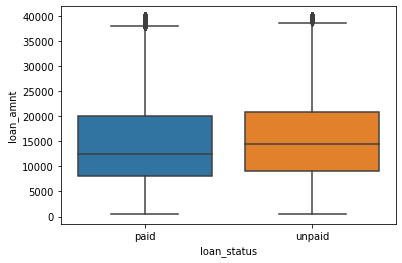

In [81]:
sns.boxplot(x=cat["loan_status"], y=num["loan_amnt"])

There is no difference in amout between paid and unpaid loan

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

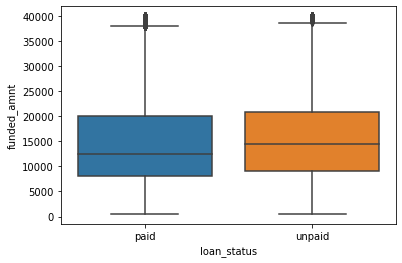

In [82]:
sns.boxplot(x=cat["loan_status"], y=num["funded_amnt"])

In [106]:
cat = cat.fillna(cat.mode())

term                        33
grade                       33
sub_grade                   33
emp_title               167002
emp_length              146940
home_ownership              33
verification_status         33
issue_d                     33
loan_status                  0
pymnt_plan                  33
purpose                     33
title                    23358
addr_state                  33
earliest_cr_line            62
initial_list_status         33
last_pymnt_d              2460
last_credit_pull_d         105
application_type            33
hardship_flag               33
disbursement_method         33
debt_settlement_flag        33
dtype: int64

In [110]:
num["freq"] = 0

In [102]:
sns.catplot(x="term", y="survived", hue="class", kind="bar", data=titanic)

' 36 months'

In [112]:
df = pd.concat([num, cat], axis= 1)

In [116]:
issue_d = df.groupby("issue_d").freq.count().reset_index()

In [ ]:
sns.catplot(x=issue_d, y="issue_d", hue="loan_status", kind="bar", data=df)